In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [30]:
import matplotlib as mp

In [2]:
df = pd.read_csv(r"C:\Users\user\Downloads\medical_examination.csv")

In [8]:
#adding an overweight column and also using the lambda function to check if the overweight value is >25
df['overweight'] = (df["weight"] / ((df["height"]/100)**2)).apply(lambda x:1 if x > 25 else 0)

In [12]:
df.head(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,0,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,0,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0


In [14]:
# Normalizing data by making 0 === always good and 1 === always bad. If the value of 'cholesterol' or 'gluc' is 1, 
#make the value 0. If the value is more than 1, make the value 1.
df["cholesterol"] = df["cholesterol"].apply(lambda x:0 if x == 1 else 1)
df["gluc"] = df["gluc"].apply(lambda x:0 if x == 1 else 1)

In [34]:
# Create DataFrame for cat plot using `pd.melt` 
#using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
df_cat = pd.melt(df, id_vars = ["cardio"], value_vars = ["cholesterol", "gluc","smoke","alco","active","overweight"])

In [35]:
# Group and reformat the data to split it by 'cardio'. Show the counts of each feature. 
#You will have to rename one of the columns for the catplot to work correctly.
df_cat["total"] = 1
df_cat = df_cat.groupby(["cardio", "variable", "value"], as_index = False).count()

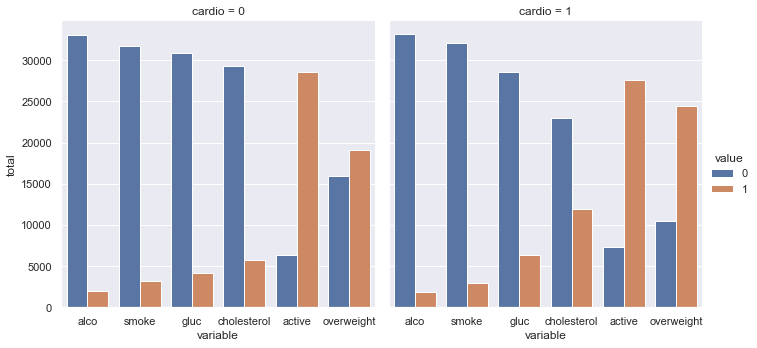

In [38]:
# Draw the catplot with 'sns.catplot()'
sns.set_theme(style="darkgrid")
fig = sns.catplot(
    x = "variable", 
    y = "total", 
    data = df_cat, 
    hue = "value", 
    kind = "bar",
    col = "cardio")
fig = fig.fig


In [44]:
fig.savefig('catplot.png')

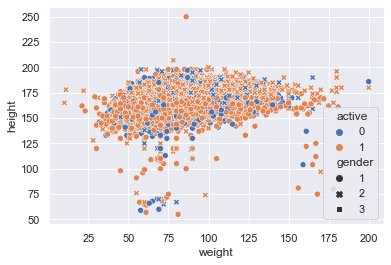

In [80]:
fig = sns.scatterplot(
        x = "weight", 
        y = "height", 
        data = df, 
        hue = "active",
        style="gender")

In [81]:
plt.savefig('scatterplot.png')

<Figure size 432x288 with 0 Axes>

In [77]:
# Clean the data
df_heat = df[(df['ap_lo'] <= df['ap_hi'])&
  (df['height'] >= df['height'].quantile(0.025))&
  (df['height'] <= df['height'].quantile(0.975))&
  (df['weight'] >= df['weight'].quantile(0.025))&
  (df['weight'] <= df['weight'].quantile(0.975))
  ]

In [62]:
#calculating the correlation matrix
corr_matrix =  df_heat.corr(method="pearson")

In [63]:
# Generate a mask for the upper triangle
mask = np.triu(corr_matrix)

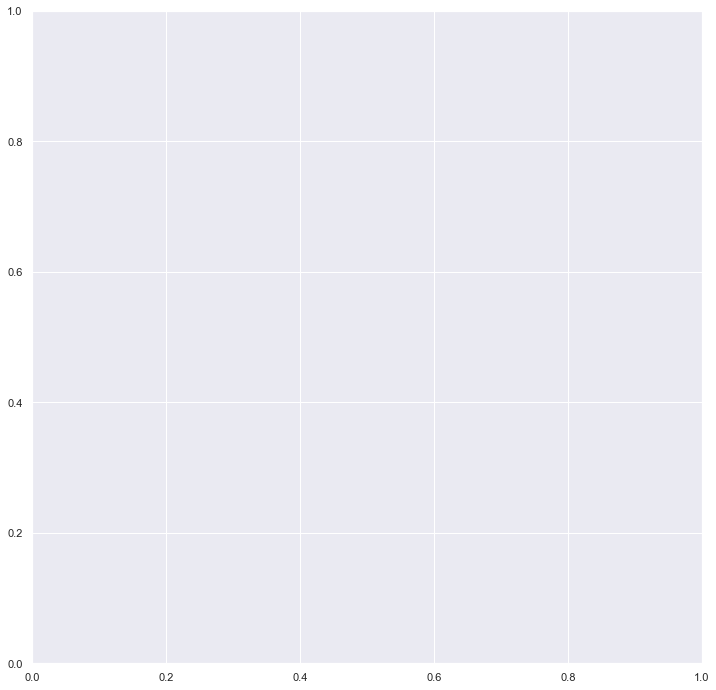

In [64]:
# Set up the matplotlib figure
fig, ax = plt.subplots(figsize =(12,12))

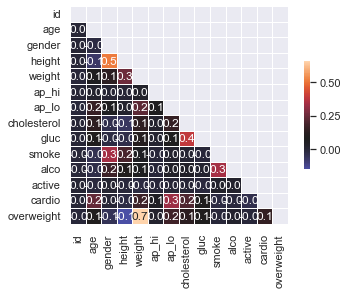

In [82]:
# Draw the heatmap with 'sns.heatmap()'
sns.heatmap(corr_matrix, linewidths=1,annot=True,square=True,mask=mask,fmt='.1f',
center =0.08, cbar_kws={"shrink":0.5})
plt.show()

In [66]:
fig.savefig('heatmap.png')